# Course-End Project: Healthcare

## Problem statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore
necessary to identify the causes and develop a system to predict heart attacks in an
effective manner. The data below has the information about the factors that might
have an impact on cardiovascular health.

## Task to be performed:
1. Preliminary analysis:
    a. Perform preliminary data inspection and report the findings on the
structure of the data, missing values, duplicates, etc.
    
    b. Based on these findings, remove duplicates (if any) and treat missing
values using an appropriate strategy

2. Prepare a report about the data explaining the distribution of the disease
    and the related factors using the steps listed below:
    a. Get a preliminary statistical summary of the data and explore the
    measures of central tendencies and spread of the data
    
    b. Identify the data variables which are categorical and describe and
    explore these variables using the appropriate tools, such as count plot
    
    c. Study the occurrence of CVD across the Age category

    d. Study the composition of all patients with respect to the Sex category
    
    e. Study if one can detect heart attacks based on anomalies in the resting
    blood pressure (trestbps) of a patient
    
    f. Describe the relationship between cholesterol levels and a target
    variable

    g. State what relationship exists between peak exercising and the
    occurrence of a heart attack

    h. Check if thalassemia is a major cause of CVD

    i. List how the other factors determine the occurrence of CVD
    
    j. Use a pair plot to understand the relationship between all the given
    variables
    
3. Build a baseline model to predict the risk of a heart attack using a logistic
regression and random forest and explore the results while using correlation
analysis and logistic regression (leveraging standard error and p-values from
statsmodels) for feature selection

In [2]:
import pandas as pd
import os, io
import numpy as np
from pandas import Series, DataFrame, read_table
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline



## 1. Preliminary analysis:

### a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [3]:
#import data
df = pd.read_excel('/Users/michaeldionne/Library/CloudStorage/Dropbox/AI_ML Bootcamp/Caltech-AI-Machine-Learning-Bootcamp/Course5_Machine Learning/Final Project/1645792390_cep1_dataset.xlsx')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Check number of columns and rows, and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
#check for missing values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum()


1

In [8]:
#remove duplicates
df.drop_duplicates(inplace=True)


In [9]:
#check for duplicates
df.duplicated().sum()


0

In [10]:
# You can fill the missing values with the mean, median, or mode of the respective column, or use any other advanced imputation techniques.
# For this example, we'll use the mean of the column to fill missing values.

df = df.fillna(df.mean())


### b. Data Analysis and Visualization

In [11]:
#Statistical summary of the data
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='thal', ylabel='count'>

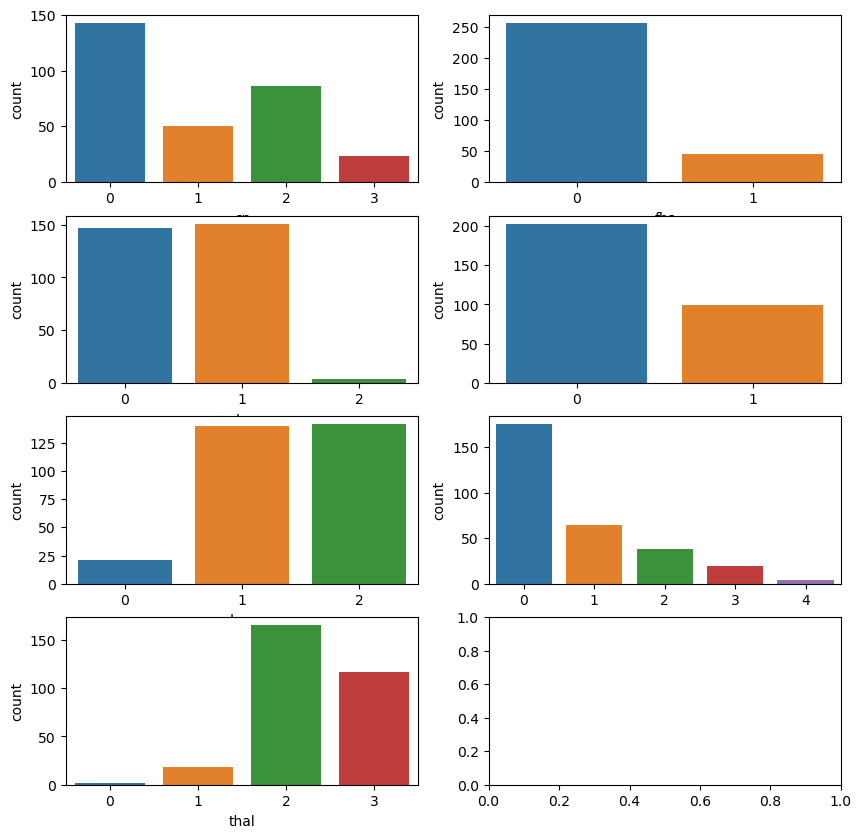

In [17]:
#Categorical variables exploration
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
sns.countplot(x='cp', data=df, ax=axes[0,0])
sns.countplot(x='fbs', data=df, ax=axes[0,1])
sns.countplot(x='restecg', data=df, ax=axes[1,0])
sns.countplot(x='exang', data=df, ax=axes[1,1])
sns.countplot(x='slope', data=df, ax=axes[2,0])
sns.countplot(x='ca', data=df, ax=axes[2,1])
sns.countplot(x='thal', data=df, ax=axes[3,0])




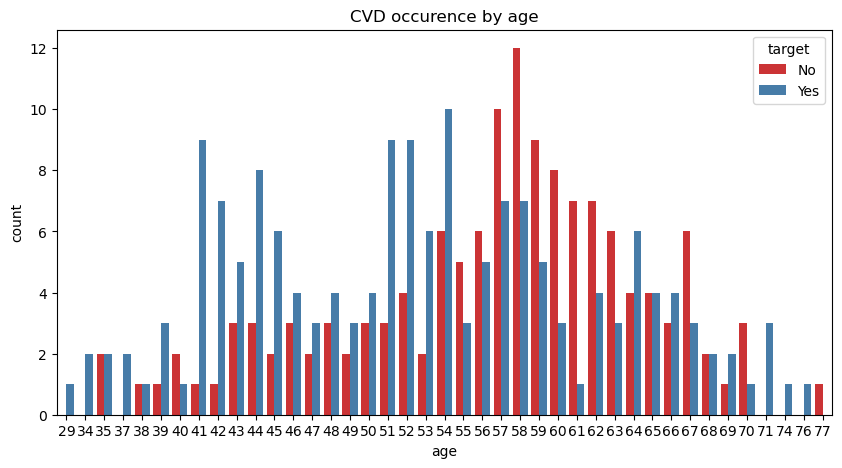

In [19]:
#CVD occurence by age

plt.figure(figsize=(10, 5))
sns.countplot(x='age', data=df, hue='target', palette='Set1')
plt.title('CVD occurence by age')
plt.legend(title='target', loc='upper right', labels=['No', 'Yes'])
plt.show()



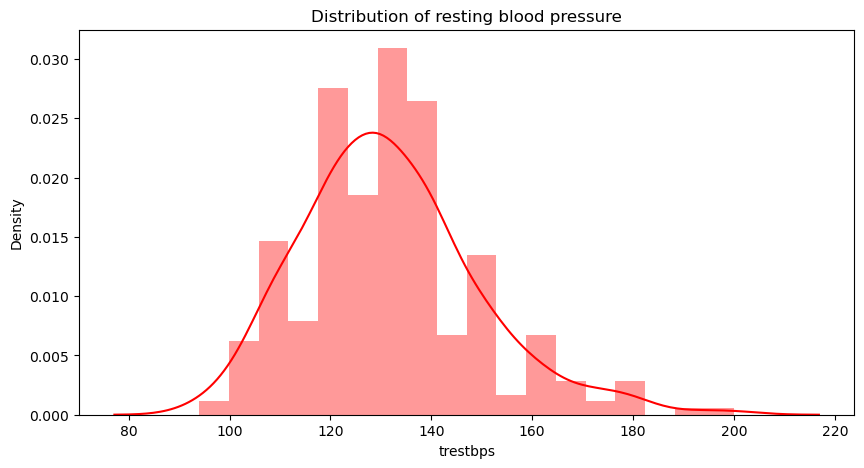

In [21]:
# Detect heart attacks based on resting blood pressure (trestbps)
plt.figure(figsize=(10, 5))
sns.distplot(df['trestbps'], color='red')
plt.title('Distribution of resting blood pressure')
plt.show()






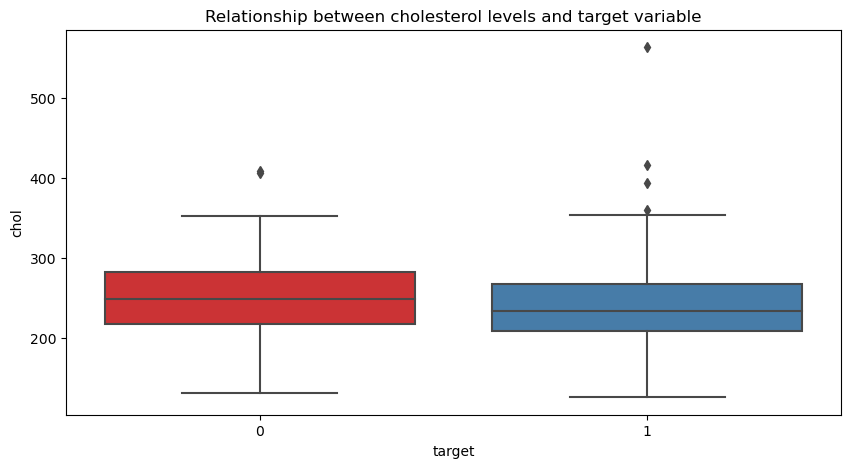

In [22]:
#Relationship between cholesterol levels and target variable:
plt.figure(figsize=(10, 5))
sns.boxplot(x='target', y='chol', data=df, palette='Set1')
plt.title('Relationship between cholesterol levels and target variable')
plt.show()


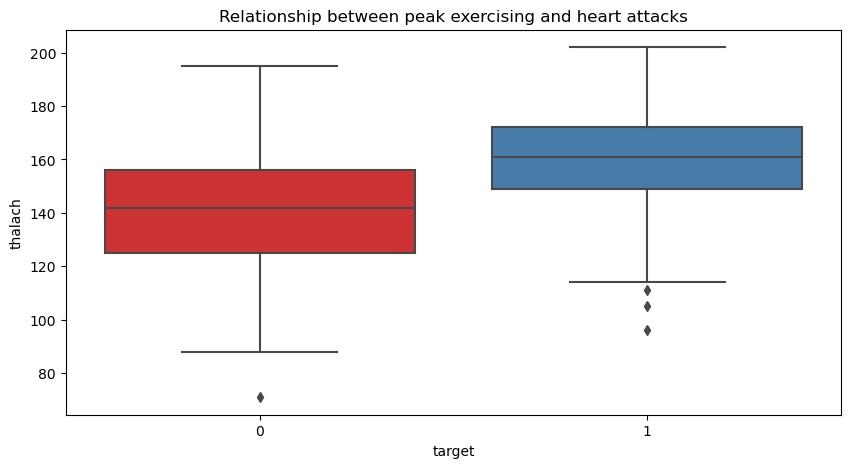

In [23]:
#Relationship between peak exercising and heart attacks
plt.figure(figsize=(10, 5))
sns.boxplot(x='target', y='thalach', data=df, palette='Set1')
plt.title('Relationship between peak exercising and heart attacks')
plt.show()


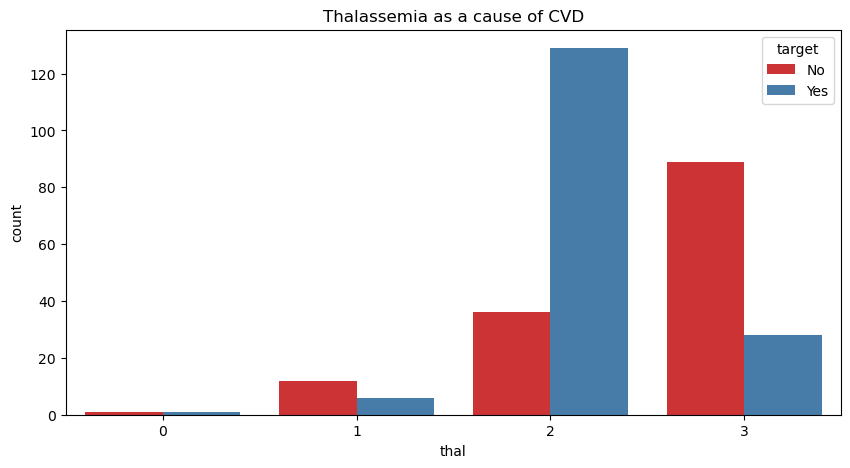

In [24]:
#Thalassemia as a cause of CVD
plt.figure(figsize=(10, 5))
sns.countplot(x='thal', data=df, hue='target', palette='Set1')
plt.title('Thalassemia as a cause of CVD')
plt.legend(title='target', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [ ]:
# Study the composition of sex and age groups in the dataset
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', data=df)
plt.show()
